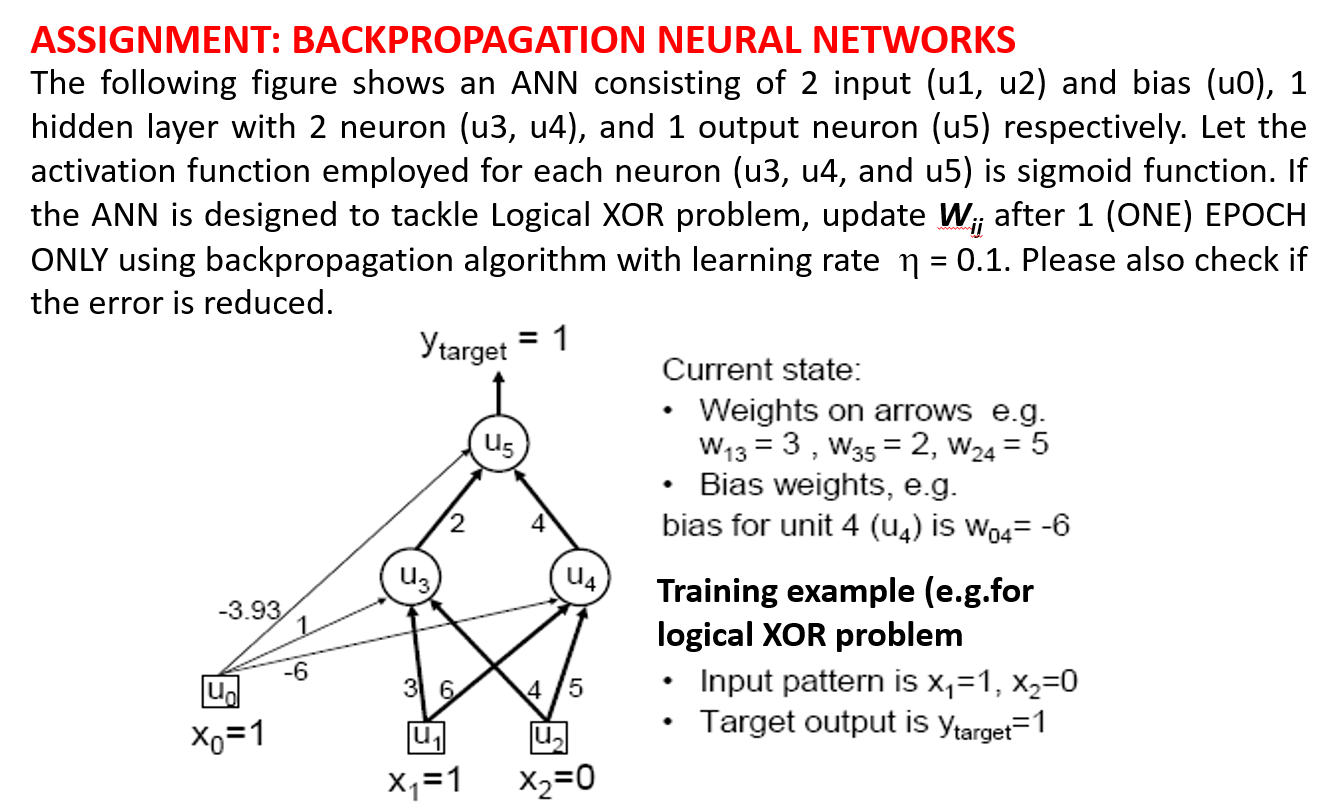

In [22]:
import numpy as np

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Given weights and biases from the diagram
weights = {
    'w13': 3, 'w14': 6,
    'w23': 4, 'w24': 5,
    'w35': 2, 'w45': 4,
    'b3': 1, 'b4': -6, 'b5': -3.93
}

# Given learning rate and inputs
learning_rate = 0.1
inputs = np.array([1, 0])  # XOR input
target = np.array([1])     # XOR target

# Perform forward pass
u1, u2 = inputs
u0 = 1  # bias

print("----------First Epoch----------\n")

# Calculate the net input for hidden neurons
net_u3 = (u0 * weights['b3']) + (u1 * weights['w13']) + (u2 * weights['w23'])
net_u4 = (u0 * weights['b4']) + (u1 * weights['w14']) + (u2 * weights['w24'])
print("Net input u3: ", net_u3)
print("Net input u4: ", net_u4,"\n")

# Apply sigmoid activation function
out_u3 = sigmoid(net_u3)
out_u4 = sigmoid(net_u4)
print("activation function u3 1/(1+e-net): ", out_u3)
print("activation function u4 1/(1+e-net): ", out_u4,"\n")


# Calculate the net input for output neuron
net_u5 = (u0 * weights['b5']) + (out_u3 * weights['w35']) + (out_u4 * weights['w45'])
out_u5 = sigmoid(net_u5)
print("Net input u5: ", net_u5)
print("activation function u5 1/(1+e-net): ", out_u5,"\n")

# Perform backward pass (backpropagation)
# Calculate error at the output
error = target - out_u5
print("Initial error: ",error,"\n")

print("------------------------------\n")

# Calculate the gradient for the output layer
delta_u5 = error * sigmoid_derivative(out_u5)
print("Delta u5: ", delta_u5)

# Calculate the gradient for the hidden layer
delta_u3 = sigmoid_derivative(out_u3) * weights['w35'] * delta_u5
delta_u4 = sigmoid_derivative(out_u4) * weights['w45'] * delta_u5
print("Delta u3: ", delta_u3)
print("Delta u4: ", delta_u4)

# Update weights for the output layer
weights['w35'] += learning_rate * out_u3 * delta_u5
weights['w45'] += learning_rate * out_u4 * delta_u5
weights['b5'] += learning_rate * u0 * delta_u5

# Update weights for the hidden layer
weights['w13'] += learning_rate * u1 * delta_u3
weights['w23'] += learning_rate * u2 * delta_u3
weights['b3'] += learning_rate * u0 * delta_u3

weights['w14'] += learning_rate * u1 * delta_u4
weights['w24'] += learning_rate * u2 * delta_u4
weights['b4'] += learning_rate * u0 * delta_u4

# Check if the error is reduced (comparing squared error before and after the weight update)
error_before = (target - sigmoid(net_u5))**2
error_after = (target - sigmoid((u0 * weights['b5']) + 
                                (sigmoid((u0 * weights['b3']) + (u1 * weights['w13']) + (u2 * weights['w23'])) * weights['w35']) + 
                                (sigmoid((u0 * weights['b4']) + (u1 * weights['w14']) + (u2 * weights['w24'])) * weights['w45'])))**2

error_reduced = error_before > error_after
print("New error: ",error_after)


# Output the updated weights and whether the error was reduced
updated_weights = {
    'w13': weights['w13'], 'w14': weights['w14'],
    'w23': weights['w23'], 'w24': weights['w24'],
    'w35': weights['w35'], 'w45': weights['w45'],
    'b3': weights['b3'], 'b4': weights['b4'], 'b5': weights['b5']
}

updated_weights, error_reduced


----------First Epoch----------

Net input u3:  4
Net input u4:  0 

activation function u3 1/(1+e-net):  0.9820137900379085
activation function u4 1/(1+e-net):  0.5 

Net input u5:  0.034027580075816743
activation function u5 1/(1+e-net):  0.5085060742863741 

Initial error:  [0.49149393] 

------------------------------

Delta u5:  [0.12283792]
Delta u3:  [0.0043393]
Delta u4:  [0.12283792]
New error:  [0.22900762]


({'w13': array([3.00043393]),
  'w14': array([6.01228379]),
  'w23': array([4.]),
  'w24': array([5.]),
  'w35': array([2.01206285]),
  'w45': array([4.0061419]),
  'b3': array([1.00043393]),
  'b4': array([-5.98771621]),
  'b5': array([-3.91771621])},
 array([ True]))